Modelo Perceptron Simples

In [29]:
# Importações
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Definições
filepath = "../Datasets/spiral.csv"
data = np.loadtxt(filepath, delimiter=",")
results = []
epochs = 500
p, N, C = 2, 2000, 2
lr = 0.1 # Taxa de Aprendizado
size = 0.8 # Tamanho da Amostra de Treinamento

In [31]:
# Função Sinal
def sign(u):
    return 1 if u >= 0 else -1

In [32]:
# Definições iniciais de X, W e Y
X = np.concatenate((data[data[:, 2] == 1, 0], data[data[:, 2] == -1, 0]))
X = 2 * ((X - np.min(X)) / (np.max(X, axis=0) - np.min(X, axis=0))) - 1

W = np.concatenate((data[data[:, 2] == 1, 1], data[data[:, 2] == -1, 1]))
Y = np.concatenate((data[data[:, 2] == 1, 2], data[data[:, 2] == -1, 2]))

X_axis = np.linspace(-1, 1)

X_graph = X.reshape(p, int(N / 2)).T
W_graph = W.reshape(p, int(N / 2)).T
Y_graph = Y.reshape(p, int(N / 2)).T

X = X.reshape(1, N).T
W = W.reshape(1, N).T
Y = Y.reshape(1, N).T

In [33]:
# Pré-visualização do Gráfico
# plt.scatter(X_graph[:, 0], W_graph[:, 0])
# plt.scatter(X_graph[:, 1], W_graph[:, 1])

In [ ]:
# Início do Treino
rounds = 0
W_z = np.random.rand(1, 2000).T
print(W.shape, W_z.shape)
for epoca in range(epochs):
    
    # Separando conjunto de amostras de treinos e testes
    
    indexes = np.arange(N)
    np.random.shuffle(indexes)
    
    ind_train = indexes[:int(N*size)]
    ind_tests = indexes[int(N*size):]
    
    X_train, X_test = X[ind_train], X[ind_tests]
    W_train, W_test = W[ind_train], W[ind_tests]
    Y_train, Y_test = Y[ind_train], Y[ind_tests]
    
    for t in range(int(N*size)):
        x_t = X[t]
        w_t = W_z[t]
        u_t = np.dot(w_t.T, x_t)
        y_t = sign(u_t)
        d_t = Y[t]
        e_t = d_t - y_t
        W_z[t] = w_t + (lr * e_t * x_t) / 2
    x2 = -W_z[1, 0] / W_z[2, 0] * X_axis + W_z[0, 0] / W_z[2, 0]
    x2 = np.nan_to_num(x2)
    
# TO-DO: Obter acurácia, sensibilidade e especificidade

(2000, 1) (2000, 1)


Acurácia: 0.53
Sensibilidade: 0.40
Especificidade: 0.65


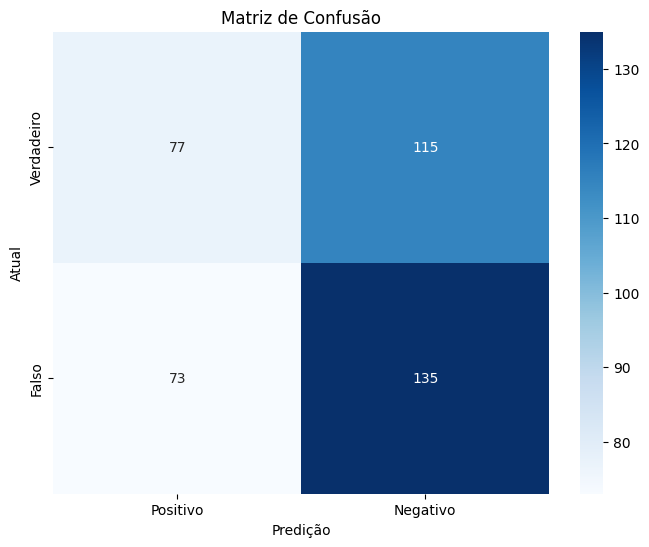

In [35]:
predictions = np.array([sign(w_z.T @ x.T) for x, w_z in zip(X_test, W_test)])
TP = np.sum((predictions == 1) & (Y_test.flatten() == 1))
TN = np.sum((predictions == -1) & (Y_test.flatten() == -1))
FP = np.sum((predictions == 1) & (Y_test.flatten() == -1))
FN = np.sum((predictions == -1) & (Y_test.flatten() == 1))

accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

print(f"Acurácia: {accuracy:.2f}")
print(f"Sensibilidade: {sensitivity:.2f}")
print(f"Especificidade: {specificity:.2f}")

confusion = np.array([[TP, FN], [FP, TN]])

plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Positivo", "Negativo"],
    yticklabels=["Verdadeiro", "Falso"],
)

plt.xlabel("Predição")
plt.ylabel("Atual")
plt.title("Matriz de Confusão")
plt.show()

# TODO: Curva de Aprendizado

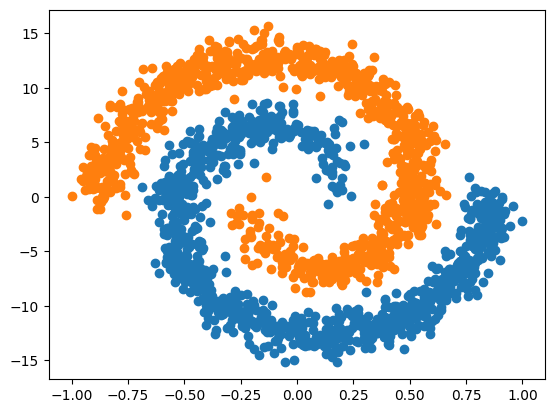

In [43]:
# Pré-visualização do Gráfico
plt.scatter(X_graph[:, 0], W_graph[:, 0])
plt.scatter(X_graph[:, 1], W_graph[:, 1])